# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## Esercizi N.4

Partendo dal codice fornito ho costruito una classe, <span style="color:blue"><font face="Courier">MolDyn</font></span>, in grado di rappresentare il sistema registrando posizione e valore dei parametri termodinamici istantanteamente. Ho implementato i metodi necessari allo svolgimento degli esercizi direttamente sulle funzioni fornite. Così, p.e., il metodo "measure" fornisce anche la pressione.
Per quanto riguarda "costruttore" e metodo "input" ho deciso di lasciare quest'ultimo, così che dal main è possibile, volendo, invocare il metodo più volte, senza dover far ripartire il programma ogni volta. Lo svantaggio è che i dati sui parametri non vengono sovrascritti, ma i file di output continuano a riempirsi... dipende da cosa si vuole fare insomma. Il metodo input è stato modificato: se sono presenti i file che contengono le ultime e le penultime posizioni finali, non viene imposta la configurazione cristallina (una stampa a video lo segnala, nel caso ci fosse dimenticati di eliminare quei file). Se non ci sono quei file viene registrata la struttura cristallina.

Ho aggiunto due parametri in <span style="color:blue"><font face="Courier">input.dat</font></span>, cioè il numero di bocchi, per la statistica, e il numero di bin, per lo studio della funzione $g(r)$.

### Organizzazione dei file di output

Consultare la guida <span style="color:blue"><font face="Courier">Guida.txt</font></span>


- Nella cartella <span style="color:blue"><font face="Courier">RisultatiNotebook</font></span> sono salvati i risultati progressivi per i tre stati di aggregazione e per i due gas. Il notebook si affida a quei risultati, se si esegue il programma nuovamente bisona ricordarsi di copiarli. 

### Unità di Lennard-Jones
Dato un potenziale di tipo L-J
$$V(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^6]$$

con $r$ distanza intermolecolare, si decide di misurare le energia in unità di $\epsilon$ e le lunghezze in unità di $\sigma$.
Eseguendo le sostituzioni le osservabili fisiche diventano:

$$r ----> r^*=\frac{r}{\sigma}$$
$$V ----> V^*=\frac{V}{\sigma^3} $$
$$T ----> T^*=K_B\frac{T}{\epsilon}$$
$$\rho ----> \rho^*=\rho \sigma^3 $$
$$P ----> P^*=p \frac{\sigma^3}{\epsilon} $$

da cui segue che il potenziale di L-J e la pressione si scrivono come:

$$ V_{LJ}^*(r^*)=4[(\frac{1}{r^*})^{12}-(\frac{1}{r^*})^6]$$

$$ P^* = \rho^* T^* + \frac{1}{3V^*} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[ \left(\frac{1}{|\vec{r}_i^* -\vec{r}_j^*|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r}_i^* -\vec{r}_j^*|}\right)^6 \right] \right\rangle $$


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

file= open("RisultatiNotebook/LJUnits/Liquido/input.dat")
temp=file.readline()
npart=file.readline()
rho=file.readline()
rcut=file.readline()
delta=file.readline()
nstep=file.readline()
iprint=file.readline()
nblocks=file.readline()
file.close()
L=int(nstep)/int(nblocks)

print('Si utilizzano le unità di L-J.', '\n')
print('Temperatura=', temp)
print('Numero di particelle=', npart)
print('Densità delle particelle=', rho)
print('raggio di cut=', rcut,)
print('intervallo temporale=', delta)
print('numero di step=', nstep)
print('numero di blocchi=', nblocks)

Si utilizzano le unità di L-J. 

Temperatura= 1.1

Numero di particelle= 108

Densità delle particelle= 0.8

raggio di cut= 2.5

intervallo temporale= 0.0005

numero di step= 50000

numero di blocchi= 100



Dopo aver eseguito il programma 7 volte con 300 step per stabilizzare la temperatura ho eseguito il programma con i parametri riportati sopra. Ho graficato ogni 10 step le osservabili rilevanti. 

In azzurro-verde l'energia potenziale, negativa.
In viola l'energia cinetica, positiva. 
L'energia totale in azzurro è conservata lungo la simulazione.
In giallo la temperatura.

<img src="LJUnits/immagini/IstantData.png" width="1000">

Riporto le medie al variare del numero di blocchi:


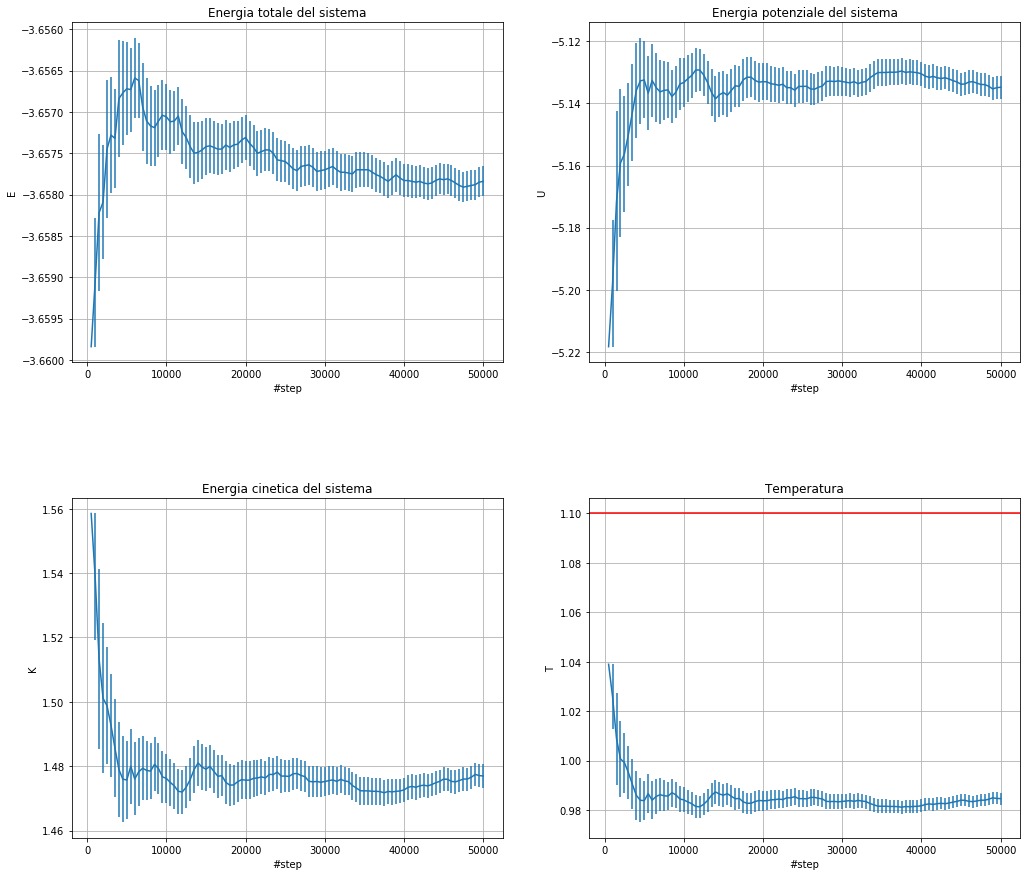

In [2]:
fig=plt.figure(figsize=(17,15))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(2,2,1)
x, f, error=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/progressivi/BlockAveE.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia totale del sistema')
plt.xlabel('#step')
plt.ylabel('E')
plt.grid(True)

plt.subplot(2,2,2)
x, f, error=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/progressivi/BlockAveU.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L
plt.errorbar(x,f,yerr=error)
plt.title('Energia potenziale del sistema')
plt.xlabel('#step')
plt.ylabel('U')
plt.grid(True)

plt.subplot(2,2,3)
x, f, error=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/progressivi/BlockAveK.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia cinetica del sistema')
plt.xlabel('#step')
plt.ylabel('K')
plt.grid(True)

plt.subplot(2,2,4)
x, f, error=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/progressivi/BlockAveT.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L
plt.errorbar(x,f,yerr=error)
plt.title('Temperatura')
plt.xlabel('#step')
plt.ylabel('T')
plt.grid(True)

print("Riporto le medie al variare del numero di blocchi:")

plt.axhline(y=1.1,color ='r')
plt.show()

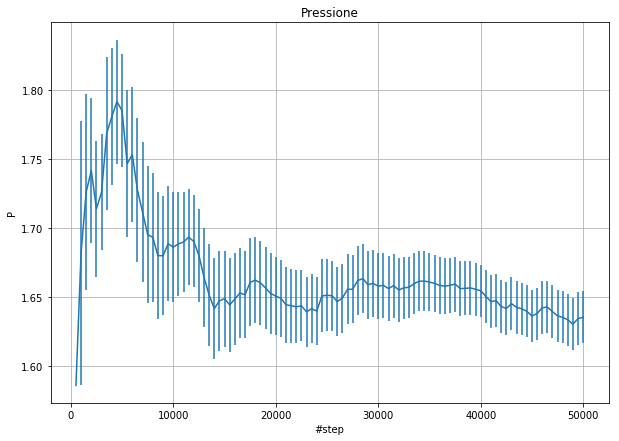

In [3]:
fig=plt.figure(figsize=(10,7))

x, f, error=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/progressivi/BlockAveP.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Pressione')
plt.xlabel('#step')
plt.ylabel('P')
plt.grid(True)
plt.show()

### Casi particolari: Argon a Kripton

Tramite simulazione MD stimiamo il valore delle osservabili fin ora considerate per due gas specifici:
- Argon ---> $\sigma= 0.340$ nm, $\epsilon/k_B= 120$ K, $m= 39,948$ amu
- Kripton ---> $\sigma=0.364$ nm, $\epsilon/k_B=164$ K, $m=83,787$ amu

La simulazione è eseguita nelle tre condizioni:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)


STATO GASSOSO: ARGON E KRIPTON
Energia potenziale media dell'Argon: U/N= -43.5932 kB, incertezza= 0.505716 Kb.
Energia potenziale media del Kripton: U/N= -59.5774 kB, incertezza= 0.691145 Kb.
Temperatura media dell'Argon: T= 162.779 K, incertezza= 0.336978 K.
Temperatura media del Kripton: T= 222.464 K, incertezza= 0.460537 K.
Pressione media dell'Argon: P= 21.564 atm, incertezza= 0.202906 atm
Pressione media del Kripton: P= 24.0173 atm, incertezza= 0.225991 atm


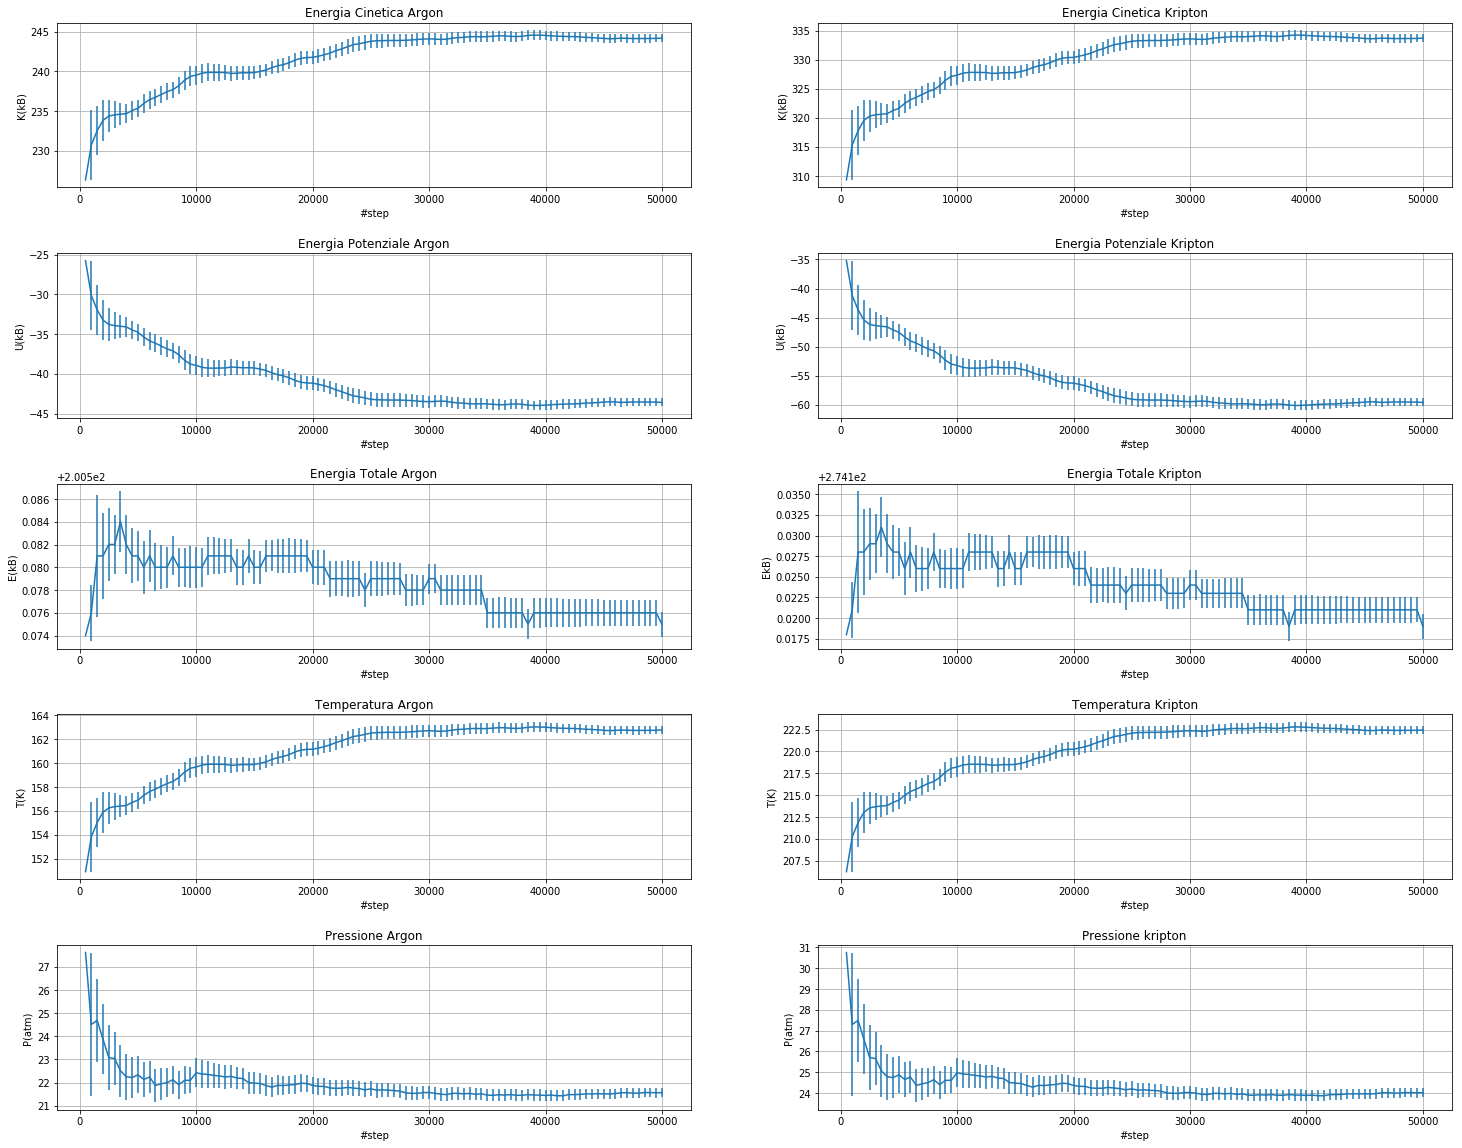

In [4]:
fig=plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

print("STATO GASSOSO: ARGON E KRIPTON")
plt.subplot(5,2,1)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Argon/BlockAveK.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Cinetica Argon')
plt.xlabel('#step')
plt.ylabel('K(kB)')
plt.grid(True)
plt.subplot(5,2,2)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI//Gas/Kripton/BlockAveK.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Cinetica Kripton')
plt.xlabel('#step')
plt.ylabel('K(kB)')
plt.grid(True)
plt.subplot(5,2,3)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Argon/BlockAveU.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Potenziale Argon')
plt.xlabel('#step')
plt.ylabel('U(kB)')
print("Energia potenziale media dell'Argon: U/N=",f[99],"kB, incertezza=",error[99],"Kb.")
plt.grid(True)
plt.subplot(5,2,4)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Kripton/BlockAveU.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Potenziale Kripton')
plt.xlabel('#step')
plt.ylabel('U(kB)')
plt.grid(True)
print("Energia potenziale media del Kripton: U/N=",f[99],"kB, incertezza=",error[99],"Kb.")
plt.subplot(5,2,5)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Argon/BlockAveE.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Totale Argon')
plt.xlabel('#step')
plt.ylabel('E(kB)')
plt.grid(True)
plt.subplot(5,2,6)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Kripton/BlockAveE.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Totale Kripton')
plt.xlabel('#step')
plt.ylabel('EkB)')
plt.grid(True)
plt.subplot(5,2,7)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Argon/BlockAveT.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Temperatura Argon')
plt.xlabel('#step')
plt.ylabel('T(K)')
print("Temperatura media dell'Argon: T=",f[99],"K, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,8)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Kripton/BlockAveT.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Temperatura Kripton')
plt.xlabel('#step')
plt.ylabel('T(K)')
print("Temperatura media del Kripton: T=",f[99],"K, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,9)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Argon/BlockAveP.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Pressione Argon')
plt.xlabel('#step')
plt.ylabel('P(atm)')
print("Pressione media dell'Argon: P=", f[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)
plt.subplot(5,2,10)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Kripton/BlockAveP.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Pressione kripton')
plt.xlabel('#step')
plt.ylabel('P(atm)')
print("Pressione media del Kripton: P=", f[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)
plt.show()

STATO LIQUIDO: ARGON E KRIPTON
Energia potenziale media dell'Argon: U/N= -616.175 kB, incertezza= 0.437407 K.
Energia potenziale media del Kripton: U/N= -842.106 kB, incertezza= 0.59779 K.
Temperatura media dell'Argon: T= 118.157 K, incertezza= 0.287698 K.
Temperatura media del Kripton: T= 161.481 K, incertezza= 0.393187 K.
Pressione media dell'Argon: P= 680.254 atm, incertezza= 7.84458 atm
Pressione media del Kripton: P= 757.646 atm, incertezza= 8.73705 atm


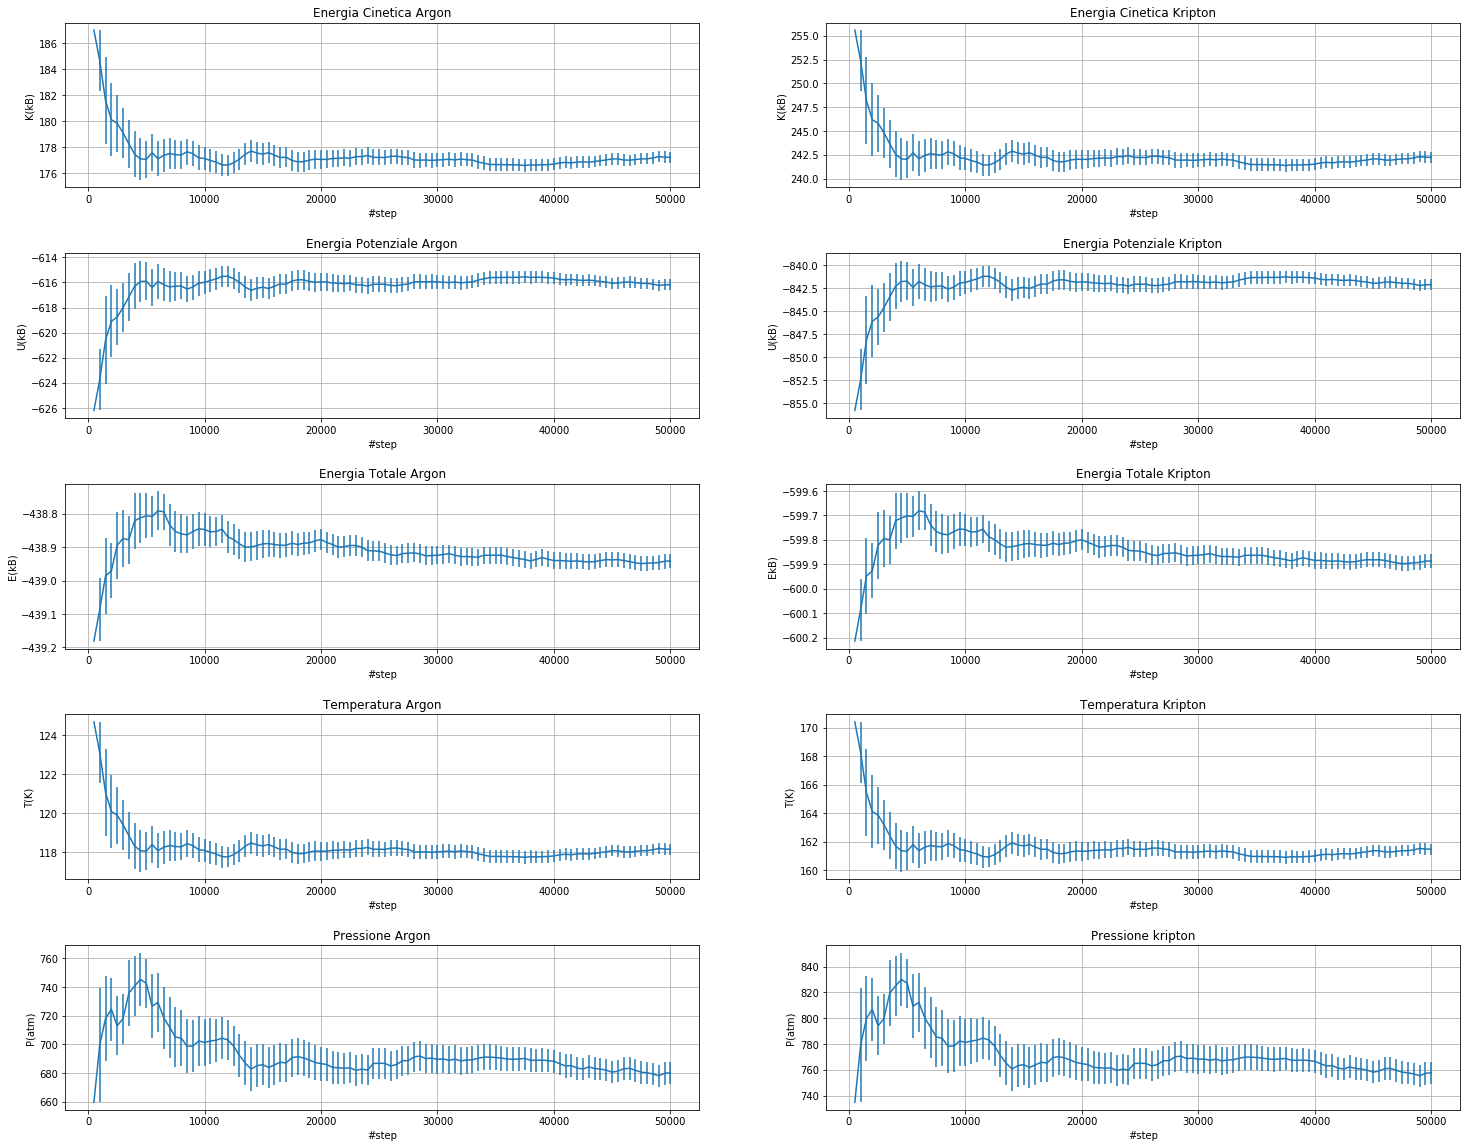

In [5]:
fig=plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

print("STATO LIQUIDO: ARGON E KRIPTON")
plt.subplot(5,2,1)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Argon/BlockAveK.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Cinetica Argon')
plt.xlabel('#step')
plt.ylabel('K(kB)')
plt.grid(True)
plt.subplot(5,2,2)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Kripton/BlockAveK.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Cinetica Kripton')
plt.xlabel('#step')
plt.ylabel('K(kB)')
plt.grid(True)
plt.subplot(5,2,3)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Argon/BlockAveU.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Potenziale Argon')
plt.xlabel('#step')
plt.ylabel('U(kB)')
print("Energia potenziale media dell'Argon: U/N=",f[99],"kB, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,4)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Kripton/BlockAveU.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Potenziale Kripton')
plt.xlabel('#step')
plt.ylabel('U(kB)')
print("Energia potenziale media del Kripton: U/N=",f[99],"kB, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,5)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Argon/BlockAveE.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Totale Argon')
plt.xlabel('#step')
plt.ylabel('E(kB)')
plt.grid(True)
plt.subplot(5,2,6)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Kripton/BlockAveE.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Totale Kripton')
plt.xlabel('#step')
plt.ylabel('EkB)')
plt.grid(True)
plt.subplot(5,2,7)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Argon/BlockAveT.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Temperatura Argon')
plt.xlabel('#step')
plt.ylabel('T(K)')
print("Temperatura media dell'Argon: T=",f[99],"K, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,8)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Kripton/BlockAveT.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Temperatura Kripton')
plt.xlabel('#step')
plt.ylabel('T(K)')
print("Temperatura media del Kripton: T=",f[99],"K, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,9)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Argon/BlockAveP.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Pressione Argon')
plt.xlabel('#step')
plt.ylabel('P(atm)')
print("Pressione media dell'Argon: P=", f[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)
plt.subplot(5,2,10)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Kripton/BlockAveP.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Pressione kripton')
plt.xlabel('#step')
plt.ylabel('P(atm)')
print("Pressione media del Kripton: P=", f[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)
plt.show()

STATO SOLIDO: ARGON E KRIPTON
Energia potenziale media dell'Argon: U/N= -799.636 kB, incertezza= 0.155611 K.
Energia potenziale media del Kripton: U/N= -1092.84 kB, incertezza= 0.212669 K.
Temperatura media dell'Argon: T= 96.5532 K, incertezza= 0.100563 K.
Temperatura media del Kripton: T= 131.956 K, incertezza= 0.137436 K.
Pressione media dell'Argon: P= 3992.96 atm, incertezza= 3.04673 atm
Pressione media del Kripton: P= 4447.23 atm, incertezza= 3.39336 atm


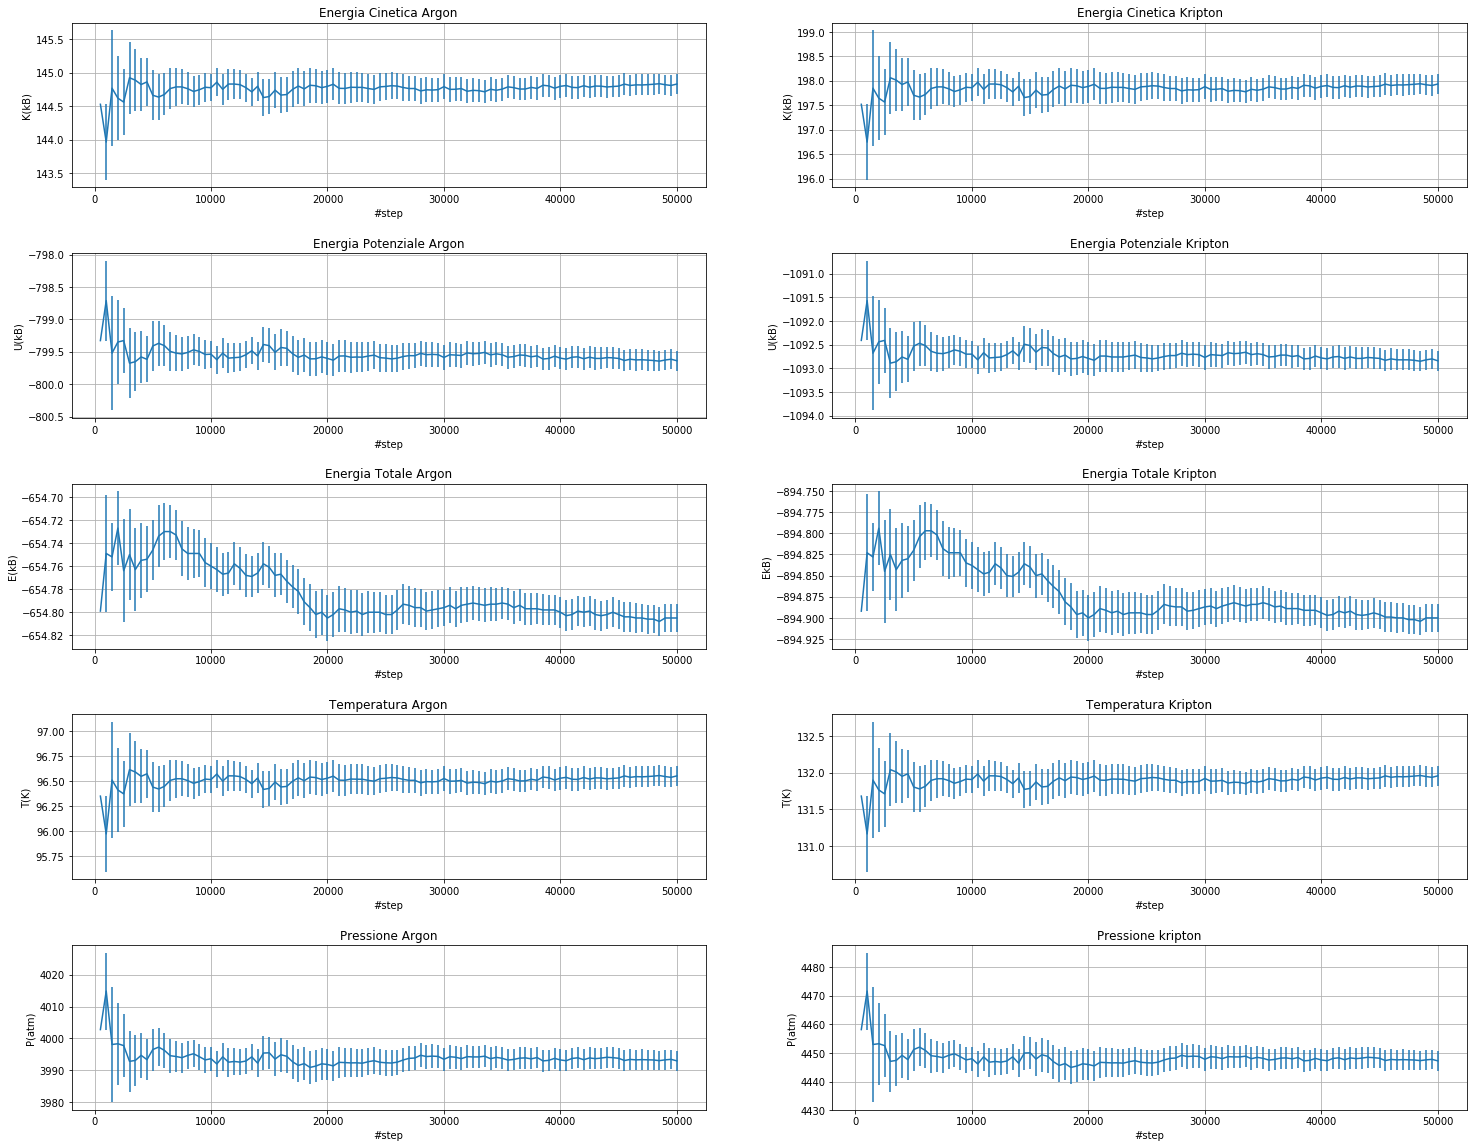

In [9]:
fig=plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

print("STATO SOLIDO: ARGON E KRIPTON")

plt.subplot(5,2,1)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Argon/BlockAveK.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Cinetica Argon')
plt.xlabel('#step')
plt.ylabel('K(kB)')
plt.grid(True)
plt.subplot(5,2,2)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Kripton/BlockAveK.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Cinetica Kripton')
plt.xlabel('#step')
plt.ylabel('K(kB)')
plt.grid(True)
plt.subplot(5,2,3)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Argon/BlockAveU.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Potenziale Argon')
plt.xlabel('#step')
plt.ylabel('U(kB)')
print("Energia potenziale media dell'Argon: U/N=",f[99],"kB, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,4)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Kripton/BlockAveU.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Potenziale Kripton')
plt.xlabel('#step')
plt.ylabel('U(kB)')
print("Energia potenziale media del Kripton: U/N=",f[99],"kB, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,5)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Argon/BlockAveE.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Totale Argon')
plt.xlabel('#step')
plt.ylabel('E(kB)')
plt.grid(True)
plt.subplot(5,2,6)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Kripton/BlockAveE.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Energia Totale Kripton')
plt.xlabel('#step')
plt.ylabel('EkB)')
plt.grid(True)
plt.subplot(5,2,7)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Argon/BlockAveT.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Temperatura Argon')
plt.xlabel('#step')
plt.ylabel('T(K)')
print("Temperatura media dell'Argon: T=",f[99],"K, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,8)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Kripton/BlockAveT.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Temperatura Kripton')
plt.xlabel('#step')
plt.ylabel('T(K)')
print("Temperatura media del Kripton: T=",f[99],"K, incertezza=",error[99],"K.")
plt.grid(True)
plt.subplot(5,2,9)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Argon/BlockAveP.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Pressione Argon')
plt.xlabel('#step')
plt.ylabel('P(atm)')
print("Pressione media dell'Argon: P=", f[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)
plt.subplot(5,2,10)
x, f, error= np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Kripton/BlockAveP.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Pressione kripton')
plt.xlabel('#step')
plt.ylabel('P(atm)')
print("Pressione media del Kripton: P=", f[99],"atm, incertezza=", error[99],"atm")
plt.grid(True)


plt.show()

### Calculation of the g(r)

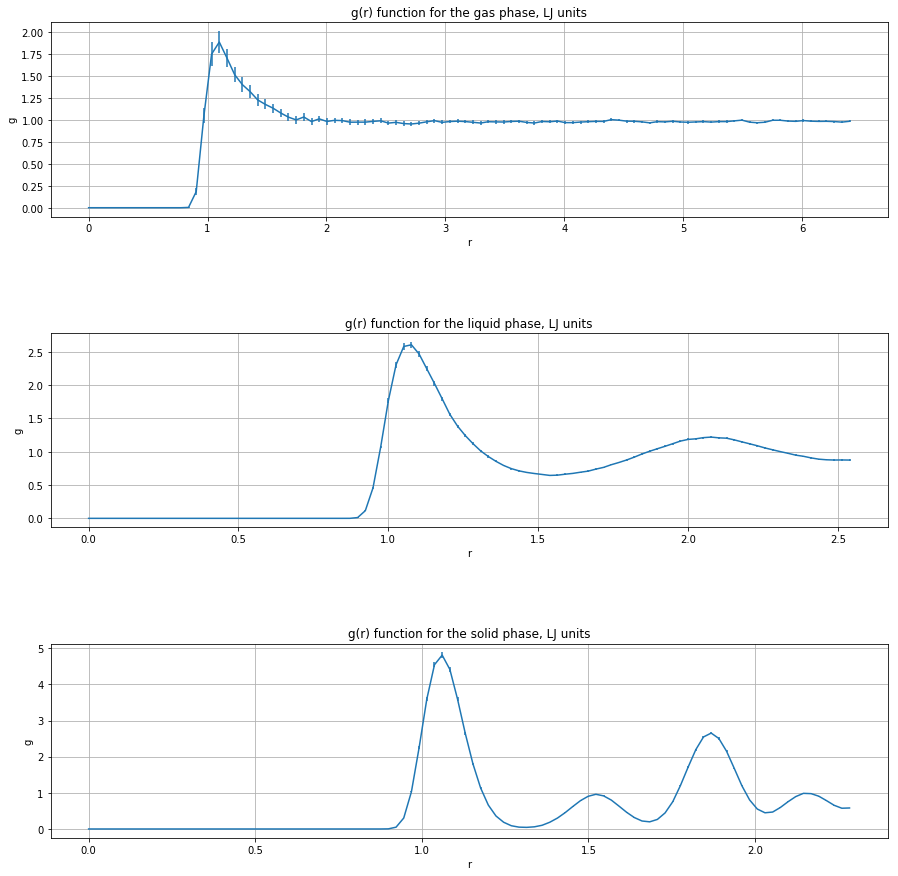

In [10]:
fig=fig=plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.6, wspace=0.2)
plt.subplot(3,1,1)
r, g, error=np.loadtxt("RisultatiNotebook/LJUnits/Gassoso/progressivi/output.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for the gas phase, LJ units')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)
plt.subplot(3,1,2)
r, g, error=np.loadtxt("RisultatiNotebook/LJUnits/Liquido/progressivi/output.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for the liquid phase, LJ units')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)
plt.subplot(3,1,3)
r, g, error=np.loadtxt("RisultatiNotebook/LJUnits/Solido/progressivi/output.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for the solid phase, LJ units')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)
plt.show()


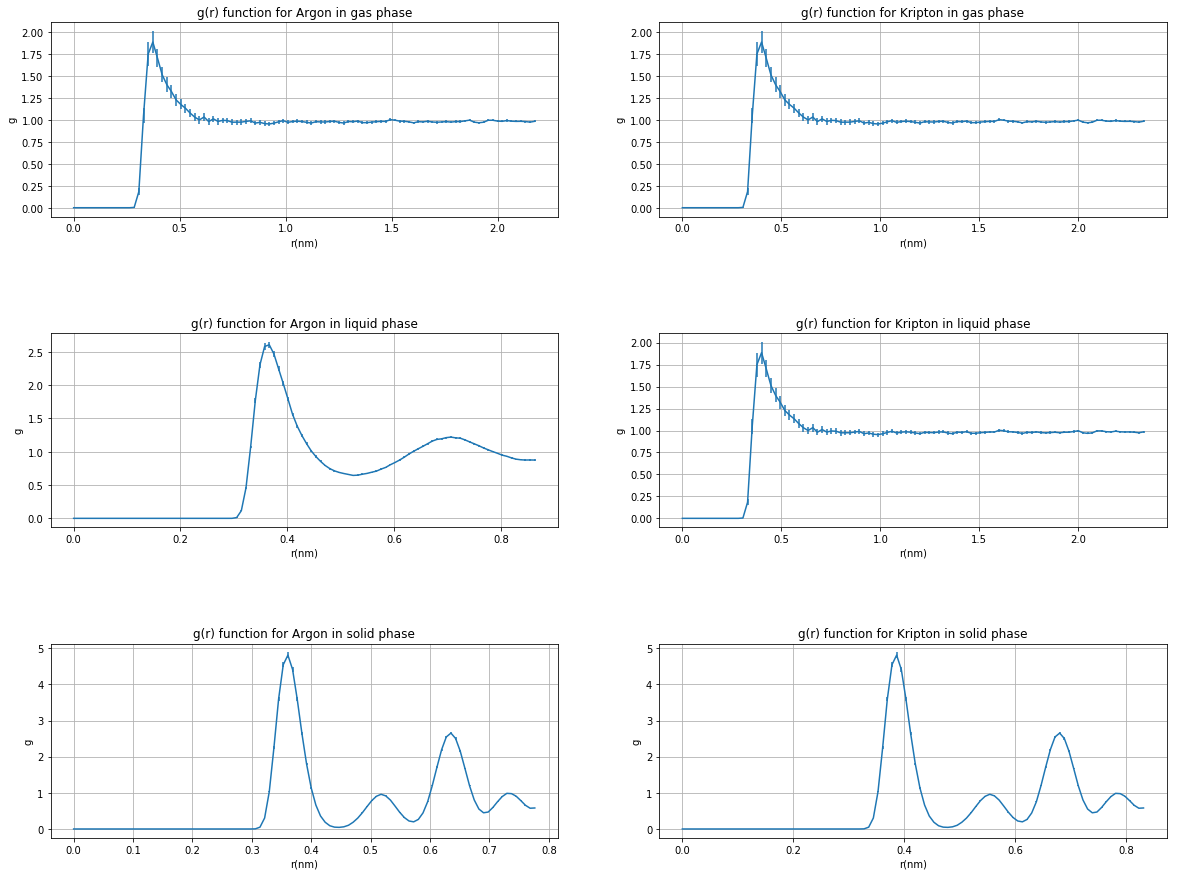

In [11]:
fig=fig=plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.6, wspace=0.2)

plt.subplot(3,2,1)
r, g, error=np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Argon/conversion.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for Argon in gas phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.grid(True)

plt.subplot(3,2,2)
r, g, error=np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Kripton/conversion.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for Kripton in gas phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.grid(True)

plt.subplot(3,2,3)
r, g, error=np.loadtxt("RisultatiNotebook/UnitaSI/Liquid/Argon/conversion.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for Argon in liquid phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.grid(True)

plt.subplot(3,2,4)
r, g, error=np.loadtxt("RisultatiNotebook/UnitaSI/Gas/Kripton/conversion.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for Kripton in liquid phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.grid(True)

plt.subplot(3,2,5)
r, g, error=np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Argon/conversion.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for Argon in solid phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.grid(True)

plt.subplot(3,2,6)
r, g, error=np.loadtxt("RisultatiNotebook/UnitaSI/Solid/Kripton/conversion.G.100", usecols=(0,1,2), delimiter='     ', unpack='true')
plt.errorbar(r,g, yerr=error)
plt.title('g(r) function for Kripton in solid phase')
plt.xlabel('r(nm)')
plt.ylabel('g')
plt.grid(True)
plt.show()